In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [66]:
# matriz de convolucion
def conv_vertical(img, mascara1):
    mascara = np.ones((mascara1, 1), np.float32) / mascara1
    img_conv = cv2.filter2D(img, -1, mascara)
    return img_conv

In [48]:
# matriz de convolucion
def conv_horizontal(img, mascara1):
    mascara = np.ones((1, mascara1), np.float32) / mascara1
    img_conv = cv2.filter2D(img, -1, mascara)
    return img_conv

In [49]:
# matriz de convolucion
def conv_diagonal(img, mascara1):
    mascara = np.zeros((mascara1, mascara1), np.float32)

    for i in range(0, mascara1):
        for j in range(0, mascara1):
            if i == j:
                mascara[i, j] = 1 
    mascara = mascara / mascara1
    
    img_conv = cv2.filter2D(img, -1, mascara)
    return img_conv

In [50]:


# matriz de convolucion
def conv_diagonalinv(img, mascara1):
    mascara = np.zeros((mascara1, mascara1), np.float32)

    for i in range(0, mascara1):
        for j in range(0, mascara1):
            if i + j + + 1 == mascara1:
                mascara[i, j] = 1 
    mascara = mascara / mascara1
    
    img_conv = cv2.filter2D(img, -1, mascara)
    return img_conv

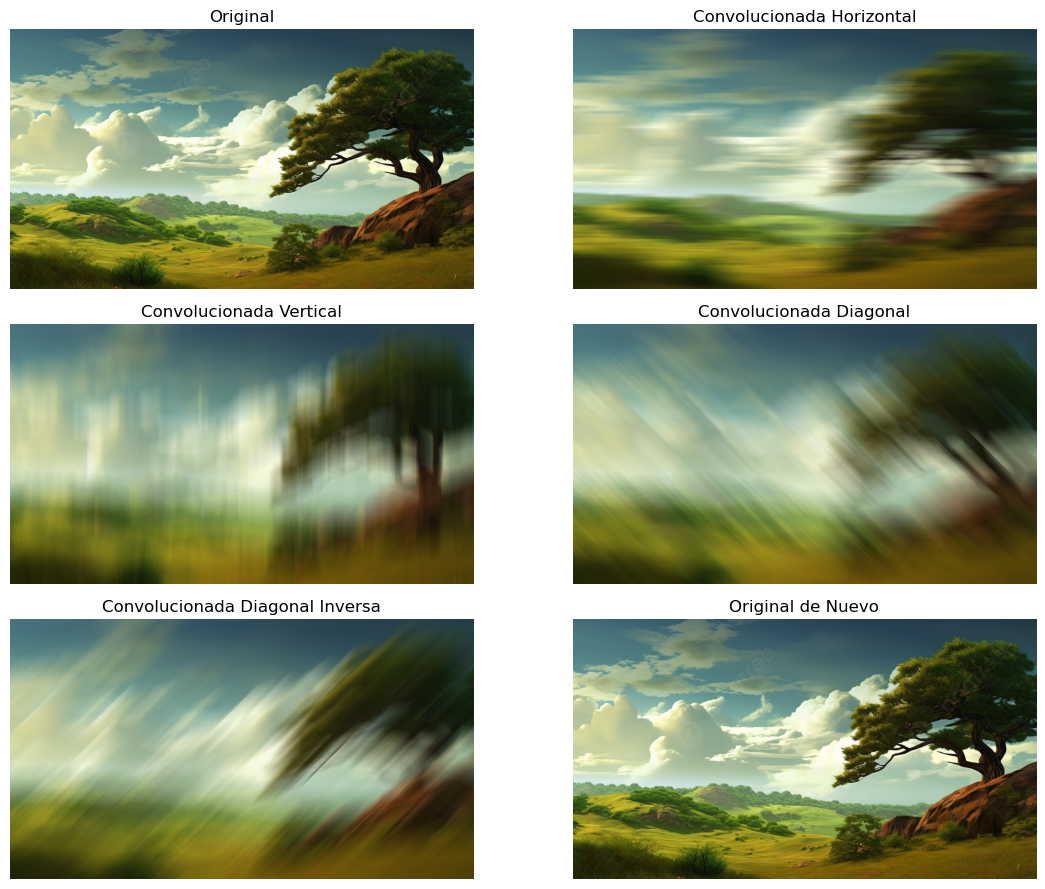

In [70]:
img = cv2.imread('..//img/img1e.jpg')

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_r = conv_horizontal(img_rgb[:,:,0], 101)
img_g = conv_horizontal(img_rgb[:,:,1], 101)
img_b = conv_horizontal(img_rgb[:,:,2], 101)

img_finh = np.stack((img_r, img_g, img_b), axis=2)

img_r = conv_vertical(img_rgb[:,:,0], 101)
img_g = conv_vertical(img_rgb[:,:,1], 101)
img_b = conv_vertical(img_rgb[:,:,2], 101)

img_finv = np.stack((img_r, img_g, img_b), axis=2)

img_r = conv_diagonal(img_rgb[:,:,0], 101)
img_g = conv_diagonal(img_rgb[:,:,1], 101)
img_b = conv_diagonal(img_rgb[:,:,2], 101)

img_find = np.stack((img_r, img_g, img_b), axis=2)

img_r = conv_diagonalinv(img_rgb[:,:,0], 101)
img_g = conv_diagonalinv(img_rgb[:,:,1], 101)
img_b = conv_diagonalinv(img_rgb[:,:,2], 101)

img_findi = np.stack((img_r, img_g, img_b), axis=2)

plt.figure(figsize=(12, 9))

plt.subplot(3, 2, 1)
plt.title('Original')
plt.imshow(img_rgb)
plt.axis('off')

plt.subplot(3, 2, 2)
plt.title('Convolucionada Horizontal')
plt.imshow(img_finh)
plt.axis('off')

plt.subplot(3, 2, 3)
plt.title('Convolucionada Vertical')
plt.imshow(img_finv)
plt.axis('off')

plt.subplot(3, 2, 4)
plt.title('Convolucionada Diagonal')
plt.imshow(img_find)
plt.axis('off')

plt.subplot(3, 2, 5)
plt.title('Convolucionada Diagonal Inversa')
plt.imshow(img_findi)
plt.axis('off')

plt.subplot(3, 2, 6)
plt.title('Original de Nuevo')
plt.imshow(img_rgb)
plt.axis('off')

plt.tight_layout()
plt.show()